<u> <h2> ADTA 5340 Mid Term Project </h2> </u>

<h3>PART ll: Machine Learning: Supervised - Linear Regression </h3>

In [1]:
"""Import all the packages used in the project here"""
#import python libraries numpy and pandas
import pandas as pd
import numpy as np
#import libraries and modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
"""import all scikit-learn module for the models "KNeighborsClassifier","Decision Tree","LinearRegression"
,"LogisticRegression" """
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
####import scikit learn module for splitting the dataset into sub data sets
from sklearn.model_selection import train_test_split
#import scikit-learn module for K-fold cross validation - model evaluation and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
""" import scikit-learn module classification report to later use the information about how the system try to 
classify each record."""
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','Bk','LSTAT','MEDV']

In [3]:
df = pd.read_csv("/Users/prithvinagkolla/Desktop/Data Sets/housing boston (2).csv",names = feature_names) #read the data as a dataframe in
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df2 = df[['RM','AGE','DIS','RAD','PTRATIO','MEDV']]

In [5]:
df[['RM','PTRATIO','MEDV']] = df [['RM','PTRATIO','MEDV']].replace(0,np.NaN)
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
Bk         0
LSTAT      0
MEDV       0
dtype: int64


EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
print(df2.shape) # we get the number of records and columns

(452, 6)


In [7]:
print(df2.dtypes) # we find the data types of the columns present in dataframe df2

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


In [8]:
print(df2.head(5))#get top 5 records in new dataframe df2

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


In [9]:
print(df2.describe()) #we find the summary statistics of the numeric variables

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


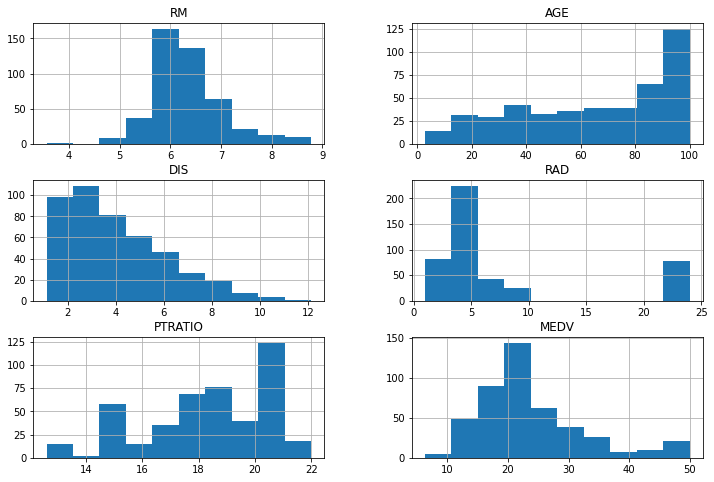

In [12]:
#histogram for each numeric
df2.hist(figsize = (12,8))
plt.show() 

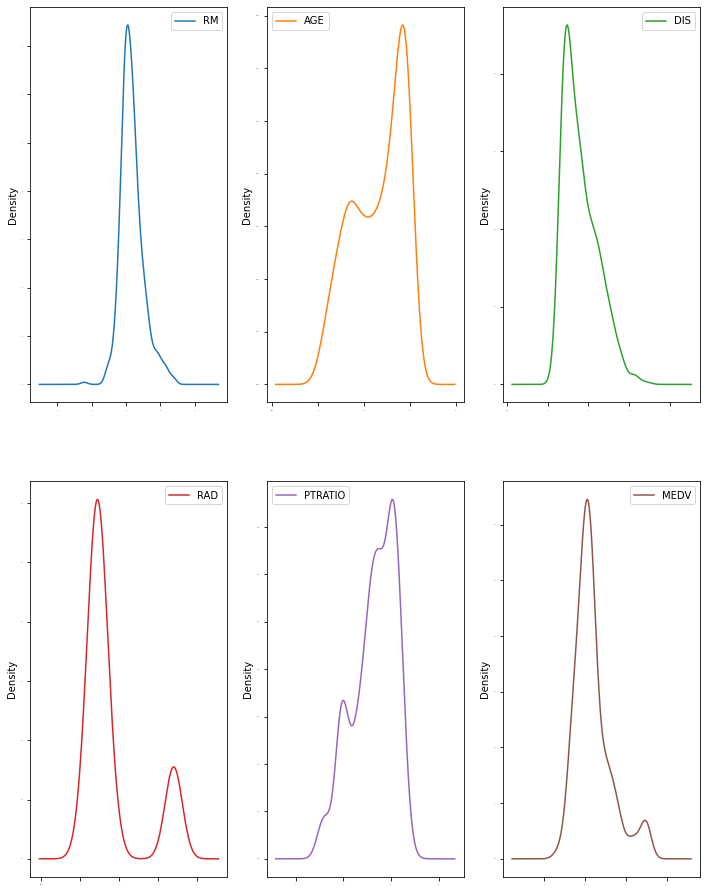

In [13]:
#Density plots
df2.plot(kind = 'density', subplots = True, layout = (2,3), sharex = False, legend = True, fontsize = 1, figsize = (12,16))
plt.show()

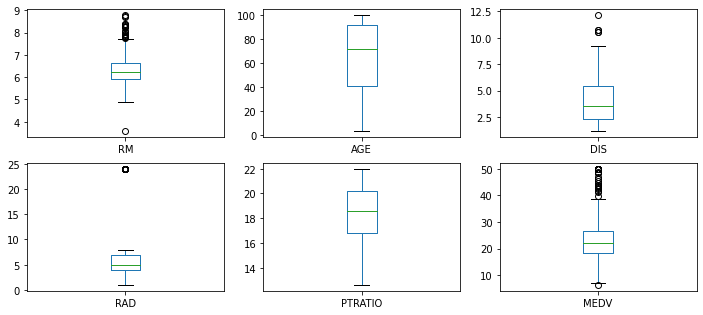

In [14]:
df2.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, figsize = (12,8))
plt.show()

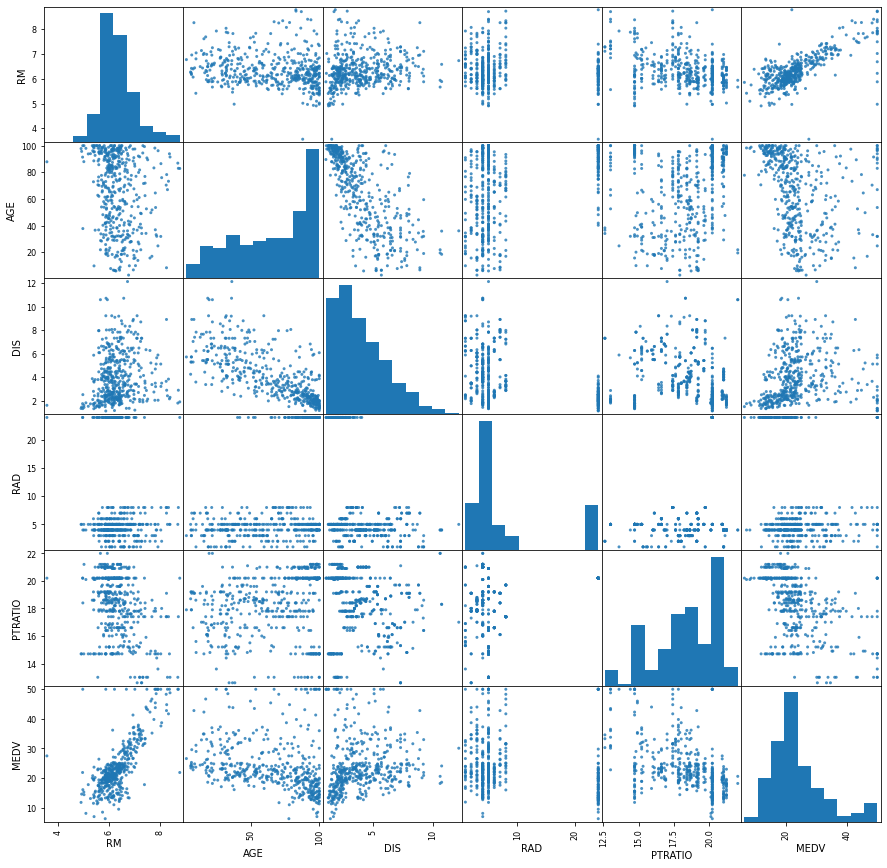

In [15]:
scatter_matrix(df2, alpha= 0.8, figsize= (15,15))
plt.show()

In [16]:
array = df2.values
X = array [:,0:5]
Y = array [:, 5]

In [17]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
R_squared = model.score(X_test, Y_test)
print('R-squared:', R_squared)

R-squared: 0.49212784664413767


In [19]:
model.predict([[10,15,25,5,16]])

array([44.26067563])

In [20]:
model.predict([[12,8,20,2,20]])

array([62.71939371])

In [21]:
num_folds = 10
seed = 7
kfold = KFold(n_splits = num_folds, random_state = seed,shuffle= True)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print("Average of all results from the K-fold Cross Validation:", results.mean())

Average of all results from the K-fold Cross Validation: -29.608165911986795


<h3>PART III: ML: Supervised: Regression: Decision Tree Regression</h3>

In [22]:
model1 = tree.DecisionTreeRegressor(random_state = seed)
model1.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=7)

In [23]:
R_squared1 = model1.score(X_test, Y_test)
print('R-squared:', R_squared1)

R-squared: 0.4754551282518267


In [24]:
model1.predict([[10,15,25,5,16]])

array([44.])

In [25]:
model1.predict([[12,8,20,2,20]])

array([42.8])

In [26]:
num_folds = 10
seed = 7
kfold1 = KFold(n_splits = num_folds, random_state = seed,shuffle= True)
scoring1 = 'neg_mean_squared_error'
results1 = cross_val_score(model1, X, Y, cv = kfold1, scoring = scoring1)
print("Average of all results from the K-fold Cross Validation:", results1.mean())

Average of all results from the K-fold Cross Validation: -32.61919178743962


<h3> PART IV: Machine Learning: Supervised - Logistic Regression </h3>

<u><h3>LOAD THE DATASET</h3></u>

Title: 
       <blockquote> pima diabetes database</blockquote>

Source: 

<blockquote>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</blockquote>

Predicted atribute: 
                       <blockquote>class</blockquote>

Number of Predictors:
                       <blockquote>8 numeric,predictive attributes and a class.</blockquote>

Attribute Information:

<blockquote>preg - Pregnancies (Number of times pregnant)

pclass - Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)

pres - BloodPressure (Diastolic blood pressure (mm Hg))

skin - SkinThickness (Triceps skin fold thickness (mm))

test - Insulin (2-Hour serum insulin (mu U/ml))

mass - BMI (Body mass index (weight in kg/(height in m)^2))

pedi - DiabetesPedigreeFunction (Diabetes pedigree function)

age - Age (Age (years))

class - Outcome (Class variable (0 or 1) 268 of 768 are 1, the others are 0)</blockquote>

In [27]:
filename = '/Users/prithvinagkolla/Desktop/Data Sets/pima_diabetes.csv'
df3 = pd.read_csv(filename)

In [28]:
# df3[['preg','plas','pres','skin','test','mass','pedi','age']] = df3[['preg','plas','pres','skin','test','mass','pedi','age']]. replace(0,np.NaN)

In [29]:
df3.fillna(df3.mean())

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
print(df3.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


Perform EDA on Pima Data Set

In [31]:
print('Shape of the dataset(rows, columns):',df3.shape)
#get the dimensions or shape of the data set
# number of records and columns

Shape of the dataset(rows, columns): (768, 9)


In [32]:
#Get the data types of all the variables 
print(df3.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [33]:
#returrn first 5 records of the data set
print(df3.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [34]:
#return the summary statistics of numeric variables
print(df3.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [35]:
# to find number of records in each class target attribute.
print(df3.groupby('class').size())

class
0    500
1    268
dtype: int64


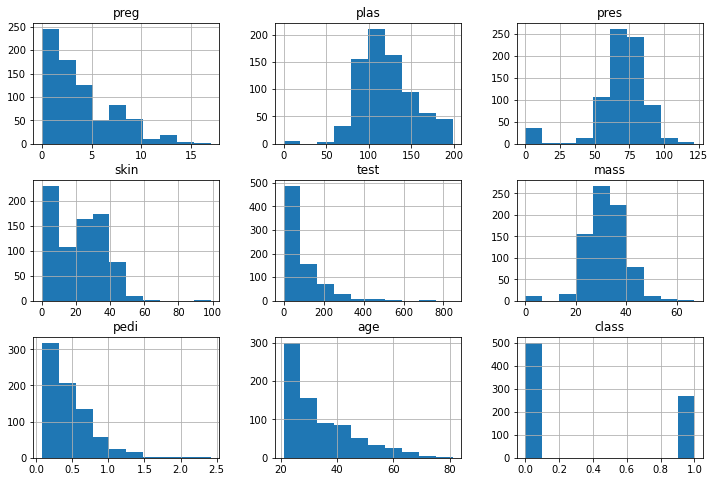

In [36]:
#plot histogram of each numeric variable in the data set.
df3.hist(figsize=(12,8))
plt.show()

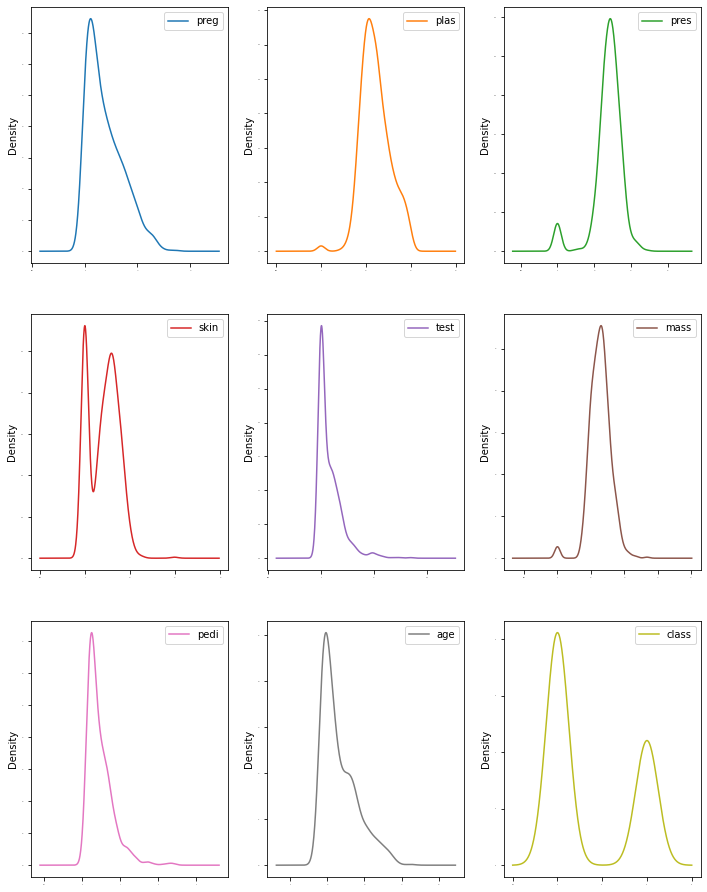

In [37]:
#generate density plot for each numeric variable.
df3.plot(kind = 'density', subplots = True, layout= (3,3), sharex = False, legend = True, fontsize = 1, figsize = (12,16))
plt.show()

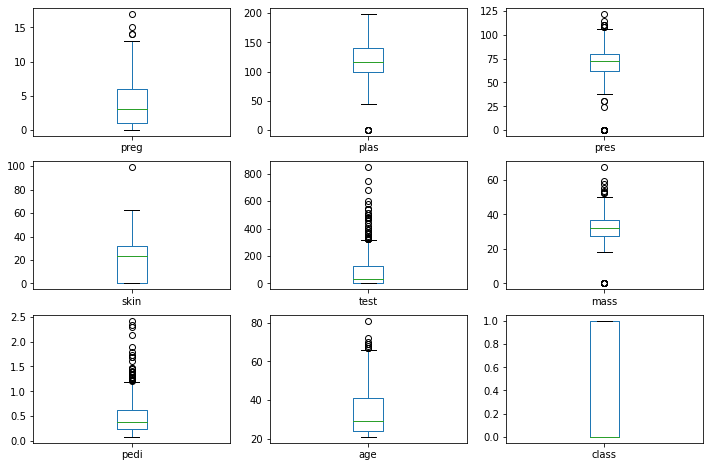

In [38]:
#generate box plots for each numeric variable
df3.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, figsize = (12,8))
plt.show()

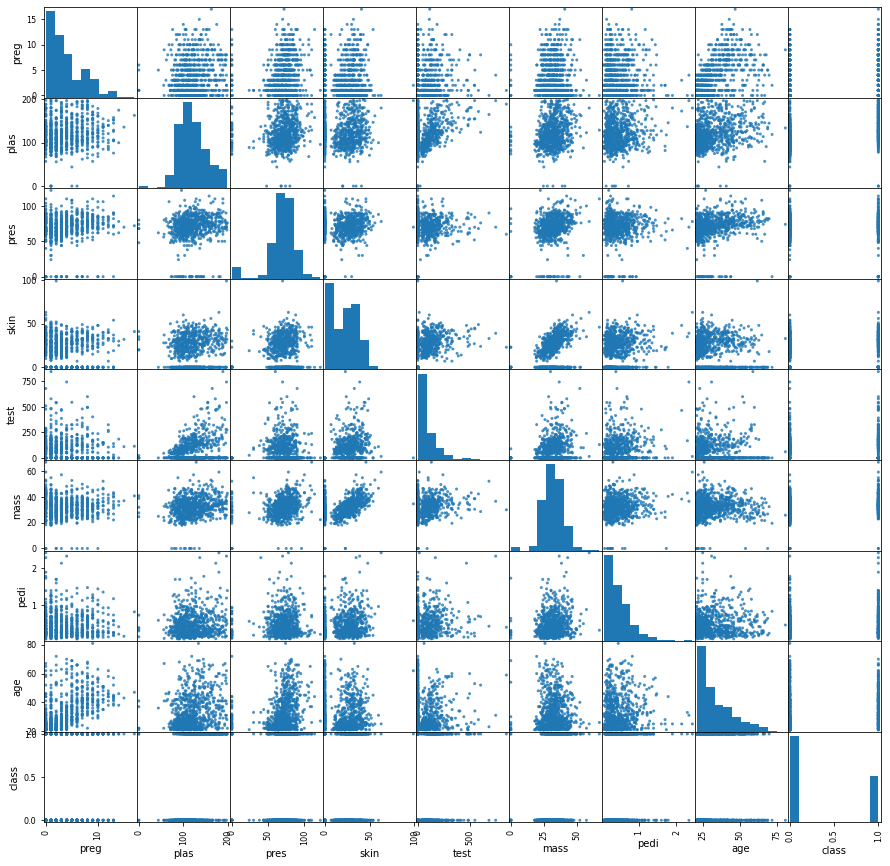

In [39]:
# generate scatter plot matrix of each variable
scatter_matrix(df3,alpha= 0.8, figsize = (15,15))
plt.show()

Seperate dataset Into Input and Output Numpy Arrays

Training set consists of independent variables or predictors.

Desired output consists of dependent variable or that we are trying to predict.

In [40]:
#store dataframe values into a numpy array.
array1 = df3.values
# seperate data set into input and output by slicing
# for X(input) [:,1:9] all the rows from 1 to 9
# these are independent variables or predictors
X1 = array1[:,0:8]
#for Y(input) [: ,9], all the rows in column 9
# these are the values we are trying to predict.
Y1 = array1[:,8]

Split Input and Output Arrays into testing and training datasets.

In [41]:
# split the data set into test 33% and training data set for 67%
test_size = 0.33
# selection of data must be done randomly
seed = 7
#split the dataset into train and test data sets.
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size = test_size, random_state = seed) 

In [42]:
#Build the model
model2 = LogisticRegression(random_state = seed)
#train the model using training data
model2.fit(X_train1, Y_train1)
#print the classification report
predicted1 = model2.predict(X_test1)
report1 = classification_report(Y_test1, predicted1)
print('Classification Report:', '\n', report1)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



In [43]:
result1 = model2.score(X_test1, Y_test1)
print(('Accuracy: %.3f%%')%(result1*100.0))

Accuracy: 78.740%


In [44]:
model2.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1.])

In [45]:
model2.predict([[7,150,80,40,0,44.6,1.254,60]])

array([1.])

In [46]:
n_splits = 10
seed = 7
kfold = KFold(n_splits, random_state = seed)
scoring = 'accuracy'
results = cross_val_score(model2, X1,Y1, cv = kfold, scoring = scoring)
print('Accuracy: %.3f (%.3f)'% (results.mean(), results.std()))

Accuracy: 0.767 (0.051)


<h3> PART V: ML: Supervised: Classification: K-Nearest Neighbors </h3>

In [48]:
#build the model
model3 = KNeighborsClassifier()
#train the model using train data - subset
model3.fit(X_train1,Y_train1)
#print the classification report
predicted2 = model3.predict(X_test1)
report2 = classification_report(Y_test1, predicted2)
print('Classification Report:', '\n', report2)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       162
         1.0       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254



<u><h3> Pre-Process the Data Set </h3></u>



In [50]:
#score the accuracy level.
result = model3.score(X_test1, Y_test1)
# print out the results
print(("Accuracy: %.3f%%") % (result * 100.0))

Accuracy: 69.291%


In [54]:
# lets use the trained model to predict the class type of a record.
print(model3.predict([[6,148,72,35,0,33.6,0.627,50]]))
print(model3.predict([[1,89,66,23,94,28.1,0.167,21]]))

[1.]
[0.]


In [56]:
# Evaluate the Algorithm
#Specify the number of time of repeated splitting, in this case 10 folds.
n_splits =10
#fix the random seed
#must use the same seed value, so that the same subsets can be obtained.
#for each time the process is repeated.
seed = 7
#split the whole data set into folds.
"""In K-fold cross validation, the original sample is randomly partitioned into k equal sized sub samples.Of the k 
subsamples a single sub sample is retained as the validation data for the testing of the model, and the remaining 
k-1 sub samples are used as training data, the cross validation is then repeated k times,with each of the k sub 
samples used exactly once as validation data, the k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for both training and
validation, and each observation is used for validation exactly once."""
kfold = KFold(n_splits, random_state = seed)
#for KNN Classifier, we use accuracy level to evaluate model/algorithm
scoring = 'accuracy'
#train the model and run the K fold cross validation to evaluate the model
results = cross_val_score(model3, X1,Y1, cv = kfold, scoring = scoring)
#print the evaluation results
#result: the average of all the results obtained from the K fold cross validation
print('Accuracy: %.3f (%.3f)'% (results.mean(), results.std()))

Accuracy: 0.727 (0.062)


<h3>PART VI: Evaluate and Compare Machine Learning Models</h3>

<u><b> <h4>Regression Models: Linear Regression vs. Decision Tree (CART) Regression </h4> </b></u>

<b><i><h6> R - squared </h6></i></b>
<ul>
    <li> Linear Regression R-squared: 0.49212784664413767 </li>
    <li> Decision Tree Regressior R-squared: 0.4754551282518267 </li>
</ul>

<p>R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.</p>

<p> Linear Regression R square value is closer to 1 than the Decision Tree Regression value </p>

<b><i><h6> Prediction </h6></i></b>

<b><i><h6> Evaluate the model using IO-fold cross-validation </h6></i></b>


<u><b> <h4>Logistic Regression vs. K-Nearest Neighbors</h4> </b></u>

<b><i><h6> Accuracy Level: </h6></i></b>

<b><i><h6> Prediction </h6></i></b>

<b><i><h6> Evaluate the model using IO-fold cross-validation</h6></i></b>

